In [10]:
# GMIT image display and manipulation using Pillow library

import urllib.request
import io
import PIL.Image

URL = 'http://www.gmit.ie/sites/all/themes/gmitpublic/images/gmit_logo.png'

with urllib.request.urlopen(URL) as url:
    imagefile = io.BytesIO(url.read())
    image = PIL.Image.open(imagefile)
    imagebw = image.convert('L')

display(image, imagebw)

OSError: cannot identify image file <_io.BytesIO object at 0x0000023B7785B6A8>

In [23]:
# Verification pillow installed ok, some error with GMIT image above to be investigated
print ("pillow version: " + PIL.__version__)

pillow version: 6.2.0


# Machine Learning & Statistics Assessment

## Boston House Prices Analysis

Python libraries I will be utilising:

Numpy is the fundamental package for scientific computing with Python. Besides it's scientific uses it can also be used as an efficient multi-dimensional container of generic data.

Pandas is a package providing fast, flexible and expressive data structures designed to make working with data both easy and initutive.

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

Scikit-learn provides a range of supervised and unsupervised learning algorithms built on SciPy.


Seaborn is a Python data visualizition library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [30]:
#import required libraries

import numpy as np
import pandas as pd
from sklearn import metrics
from pandas import DataFrame
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns


## 1. The Dataset - introduce, import and describe

The Boston House Prices data in this project was collected in 1978 by the US Census Service concerning housing in the area of Boston. It contains 506 enteries representing aggregate information about 14 features (or dataset variables) of homes from various suburbs in Boston. The dataset is accessible through the Python SKlearn library.The data was originally published by Harrison, D. and Rubinfeld, D.L.in `Hedonic prices and the demand for clean air', 1978.

The name for this dataset is simply boston. It has two prototasks: nox, in which the nitrous oxide level is to be predicted; and price, in which the median value of a home is to be predicted. 

Variable 14 seems to be censored at 50.00. The dataset has two target attributes: NOX, in which the nitrous oxide level is to be predicted; and MEDV, in which the median value of a home is to be predicted.  [2]

The target variable of a dataset is the feature of a dataset about which we try and gain a deeper understanding, the target variable of median house proce (MEDV) is latent or not an observable variable and must be inferred from other vairables.




In [31]:
from sklearn.datasets import load_boston # Importing the Boston House Dataset
boston_dataset = load_boston() # Assigning the dataset a reference
df = pd.DataFrame(boston_dataset.data) # Initialise the dataframe

In [32]:
df.head(10) # first 10 lines of the dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [33]:
df.columns = boston_dataset.feature_names # shows feature names or column headings
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [34]:
print(boston_dataset.DESCR) # Data set characteristics, describes the attributes

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [35]:
# Generates descriptive statistics summarising the central tendency, dispersion and shape of a dataset’s distribution
df.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [36]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names) # Iniatilising the dataset.
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
# House price target variable MEDV (in $1000's):
boston_dataset.target 

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [38]:
# MEDV - Median value of owner-occupied homes in $1000's

boston['MEDV'] = boston_dataset.target # Including the Median House Price (MEDV) data in the dataset.
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [39]:
# checking for missing or null values in the boston dataset
# none returned which is good
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [41]:
# https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d [3]

boston['PRICE'] = boston_dataset.target
prices = boston['PRICE']
# Minimum price of the data
minimum_price = np.amin(prices)

# Maximum price of the data
maximum_price = np.amax(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $5.0
Maximum price: $50.0
Mean price: $22.532806324110698
Median price $21.2
Standard deviation of prices: $9.188011545278206


In [46]:
# lets get some descriptive statistics for the variables, the T switches rows and columns for easier reading
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


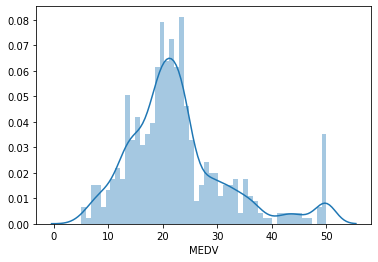

In [51]:
# create a histogram on the 'median_value' Using the Seaborn library
sns.distplot(boston['MEDV'], bins=50)
plt.show()

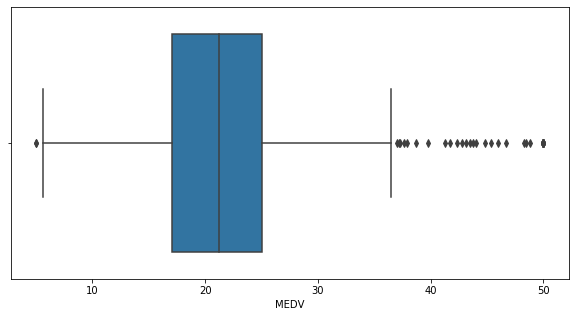

In [54]:
# A boxplot on the 'median_value' Using the Seaborn library
plt.figure(figsize=(10,5))
sns.boxplot(boston['MEDV'])

Looking at the distribution on the histogram for the median_value it shows a distribution that is quite close to a normal distribution witH some outliers. The values are centred around approximately 22,000 and the minimum value is 5,000 and maximum value is 50,000.The boxplot shows a symmetric distribution with one outlier to the left and several to the right.The range of the distribution is 45,000.

## 2. Infer - using inferential statistics 

I will attempt to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. 
MEDV - Median value of owner-occupied homes in $1000's

Accuracy is a poor metric for regression problems. The chance that the true and predicted values will be the same down to many decimal places Is low...To make a long story short: since you (erroneously) request metrics=['accuracy'] in your model compilation, Keras will do its best to satisfy you, and will return some "accuracy" indeed, calculated as shown above, despite this being completely meaningless in your setting.
see [1]

In [11]:
import tensorflow as tf
import keras as kr

Using TensorFlow backend.


In [12]:
# verification of successfull install after much work!
print ("TensorFlow version: " + tf.__version__)

TensorFlow version: 2.0.0


In [14]:
# verification of successfull install after much work!
print ("keras version: " + kr.__version__)

keras version: 2.3.1


## References:
1. https://stackoverflow.com/questions/48775305/what-function-defines-accuracy-in-keras-when-the-loss-is-mean-squared-error-mse?rq=1
2. https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
3. https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d
4. ht
